Htet Khant Linn

Feb 18, 2026

Week 3 - ACF, PACF

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## ACF

### Creating Random White Noise Data

In [50]:
num_timesteps=300
np.random.seed(0)

y = np.random.normal(loc=0, scale=1, size=num_timesteps)
# mean 0, std 1

ts = pd.date_range(start='2026-01-01', periods=num_timesteps, freq='D')

print(y[0:5])
print(ts[0:5])

[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]
DatetimeIndex(['2026-01-01', '2026-01-02', '2026-01-03', '2026-01-04',
               '2026-01-05'],
              dtype='datetime64[us]', freq='D')


In [51]:
df = pd.DataFrame(data={'data':y}, index=ts)
print(df.info())
print(df.head())

<class 'pandas.DataFrame'>
DatetimeIndex: 300 entries, 2026-01-01 to 2026-10-27
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    300 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB
None
                data
2026-01-01  1.764052
2026-01-02  0.400157
2026-01-03  0.978738
2026-01-04  2.240893
2026-01-05  1.867558


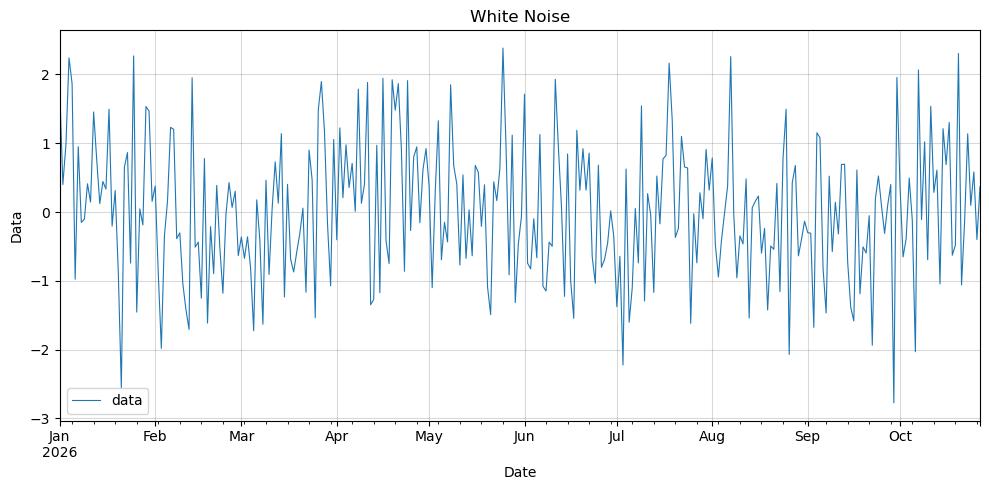

In [52]:
df.plot(figsize=(10,5), linewidth=0.8)
plt.title('White Noise')
plt.xlabel('Date')
plt.ylabel('Data')
plt.legend()
plt.grid(color='gray', alpha=0.3)
plt.tight_layout()

plt.savefig('output/white_noise.png')
plt.show()

In [53]:
df2 = df.copy()
print(df2.info())

<class 'pandas.DataFrame'>
DatetimeIndex: 300 entries, 2026-01-01 to 2026-10-27
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    300 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB
None


### Computing Lag 1

In [54]:
lag = 1

df2[f'lag_{lag}'] = df2['data'].shift(periods=lag)

print(df2.head())

                data     lag_1
2026-01-01  1.764052       NaN
2026-01-02  0.400157  1.764052
2026-01-03  0.978738  0.400157
2026-01-04  2.240893  0.978738
2026-01-05  1.867558  2.240893


### Creating ACF Plot Using Manual Calculation

In [55]:
# calculate mean of the data of the df2

data_mean = df2.data.mean()

# Numerator of the ACF equation
numerator = ((df2.data - data_mean) * (df2[f'lag_{lag}'] - data_mean)).sum()
# refer to ACF equation


# Denominator of the ACF equation
denominator = ((df2.data - data_mean)**2).sum()

r = numerator/ denominator
print(numerator)
print(denominator)
print(r)        # white noise don't have correlation


-8.906546318659103
300.42093556219584
-0.02964688962835345


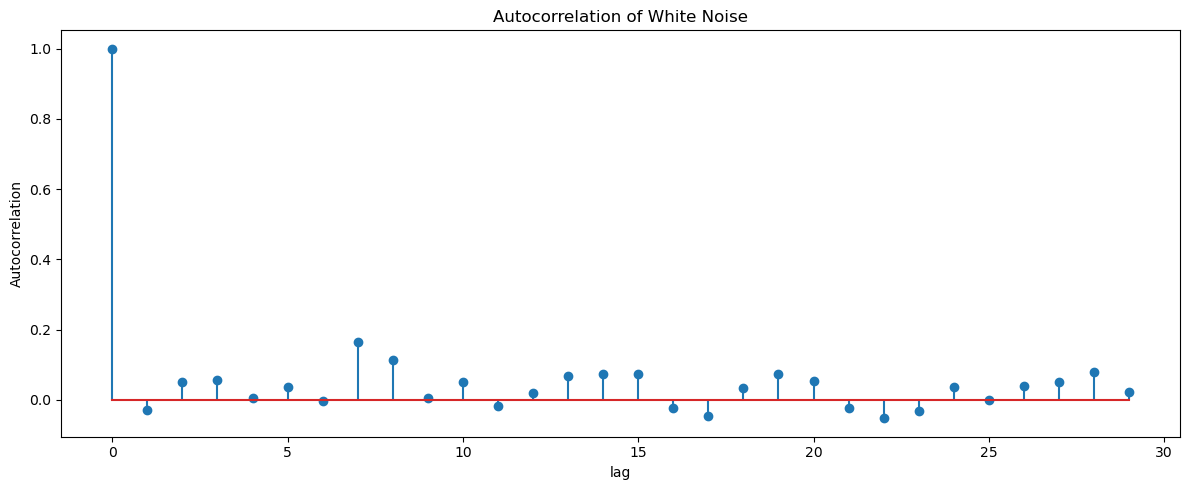

In [56]:
r = {}

for lag in range(0, 30):
    df2[f'lag_{lag}'] = df2['data'].shift(periods=lag)
    data_mean = df2.data.mean()

    # Numerator of the ACF equation
    numerator = ((df2.data - data_mean) * (df2[f'lag_{lag}'] - data_mean)).sum()
    # refer to ACF equation

    # Denominator of the ACF equation
    denominator = ((df2.data - data_mean)**2).sum()

    r[lag] = numerator/ denominator
    

acf = pd.Series(r)

# print(acf)

plt.figure(figsize=(12, 5))
plt.stem(acf)
plt.title('Autocorrelation of White Noise')
plt.ylabel('Autocorrelation')
plt.xlabel('lag')

plt.tight_layout()
plt.savefig('output/autocorrelation_of_white_noise.png')
plt.show()

### Creating ACF Plot Using plot_acf package

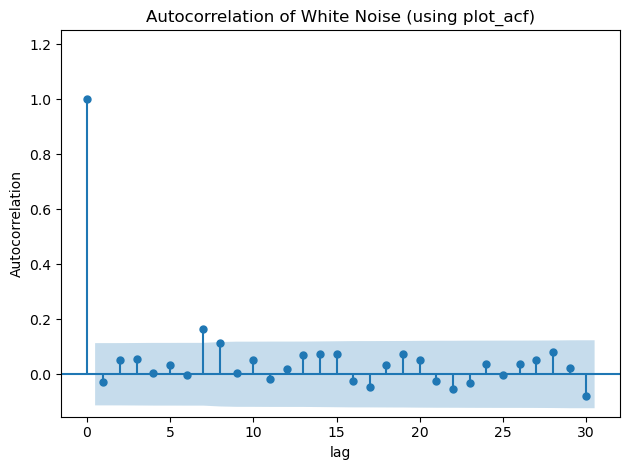

In [57]:
plot_acf(
    x = df2.data,
    lags = 30,
    alpha= 0.05,
    auto_ylims=True
);
plt.title('Autocorrelation of White Noise (using plot_acf)')
plt.ylabel('Autocorrelation')
plt.xlabel('lag')

plt.tight_layout()
plt.savefig('output/autocorrelation_of_white_noise_using_plo_acf.png')
plt.show()


## PACF

In [60]:
df3 = df.copy()

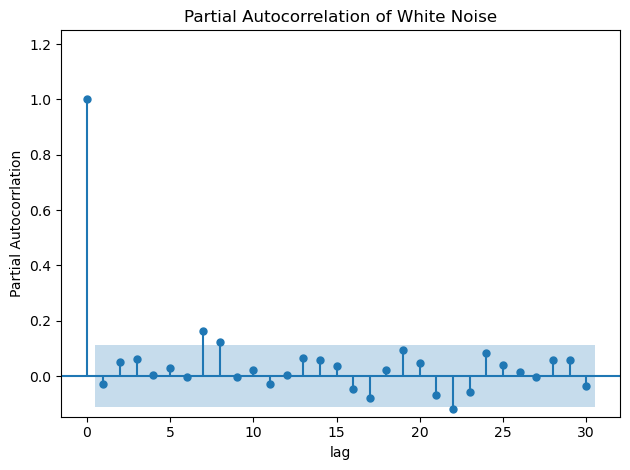

In [64]:
plot_pacf(
    x = df3.data,
    method= 'ywmle',    # this one is recommended method
    lags = 30,
    alpha= 0.05,
    auto_ylims = True
    )

plt.title('Partial Autocorrelation of White Noise')
plt.ylabel('Partial Autocorrlation')
plt.xlabel('lag')
plt.tight_layout()

plt.savefig('output/partial_autocorrelation_of_white_noise.png')
plt.show()

## Working with Retail Sales Dataset

In [58]:
retail_sales = pd.read_csv('data/retail_sales.csv', parse_dates=['ds'], index_col='ds')
print(retail_sales.info())

<class 'pandas.DataFrame'>
DatetimeIndex: 293 entries, 1992-01-01 to 2016-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       293 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB
None


In [59]:
print(retail_sales.head())

                 y
ds                
1992-01-01  146376
1992-02-01  147079
1992-03-01  159336
1992-04-01  163669
1992-05-01  170068
